In [3]:
from __future__ import division
import os
import urllib, cStringIO
import pymongo as pm ## first establish ssh tunnel to server where database is running
import base64
import numpy as np
from numpy import *
import PIL
from PIL import Image
import base64
import matplotlib
%matplotlib inline
from matplotlib import pylab, mlab, pyplot
from IPython.core.pylabtools import figsize, getfigs
plt = pyplot
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')
from matplotlib.path import Path
import matplotlib.patches as patches
import cv2
import pandas as pd
from svgpathtools import parse_path
import svg_distance_helpers as rsh

#### directory and file hierarchy

In [4]:
# directory & file hierarchy
analysis_dir = os.getcwd()
tracing_ref_pixel = os.path.join(analysis_dir, 'tracing_ref_pixel')
tracing_ref_svg = os.path.join(analysis_dir, 'tracing_ref_svg')

canvas_side = 819

In [5]:
# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'rxdhawkins.me' ## cocolab ip address

# have to fix this to be able to analyze from local
import pymongo as pm
conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['kiddraw']
coll = db['cdm_run_v3']

#### fetch an example tracing

In [6]:
imrecs = coll.find({'$and':[{'category':'square'},{'dataType':'finalImage'}, {'sessionId':'cdm_run_v31525894399483'}]}).sort('time')
print imrecs.count()

## retrieve example square tracing from db
imrec = imrecs[0] 

1


In [7]:
## get list of vertices and codes for tracing 
try:
    ## get the corresponding stroke records for this tracing
    stroke_recs = coll.find({'$and': [{'sessionId':imrec['sessionId']}, 
                                      {'dataType':'stroke'},
                                      {'trialNum': imrec['trialNum']}]}).sort('time')

    print 'Number of strokes in this tracing: {}'.format(stroke_recs.count())    
    
    ## check to make sure that there is at least one stroke! 
    if stroke_recs.count()>0:

        ## now make an svg list!
        svg_list = rsh.make_svg_list(stroke_recs)

        ## get verts and codes in all strokes
        ## both verts_list and codes_list are 2D list. Each sublist represent a stroke
        verts_list, codes_list = rsh.get_stroke_verts_and_codes(svg_list)
        
        ## Convert multiple strokes into one stroke
        
        
except Exception as e:
    print 'Oops, something went wrong! Here is the error:'  
    print e
    pass        

Number of strokes in this tracing: 3


#### preprocessing of tracing and visualization (if desired)


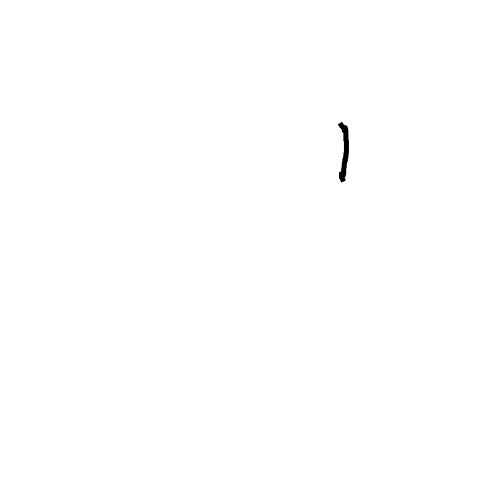

In [8]:
reallyRun = 1
if reallyRun:
    rsh.plot_stroke(verts_list[1],codes_list[1], canvas_side)
    

In [ ]:
## simplify tracing if it is a jungle of verts/horiz commands
reallySimplify = 1

if reallySimplify:
    for index, verts in enumerate(verts_list):
        _Verts,_Codes = rsh.simplify_verts_and_codes(verts,codes_list[index])
        verts_list[index] = _Verts
        codes_list[index] = _Codes


In [ ]:
## examine tracing
reallyRun = 1
if reallyRun:
    rsh.plot_shape(verts_list, codes_list, canvas_side)

#### Get the reference shape and adjust it based on the canvas size

In [9]:
## get vertices and codes for reference shape (in this example, a square)
reload(rsh)
square_file = os.path.join(tracing_ref_pixel, 'resize_square.png')
ref_verts, ref_codes = rsh.get_ref_square(square_file, canvas_side)
print ref_verts

[[234, 234], [584, 234], [584, 584], [234, 584], [234, 234]]


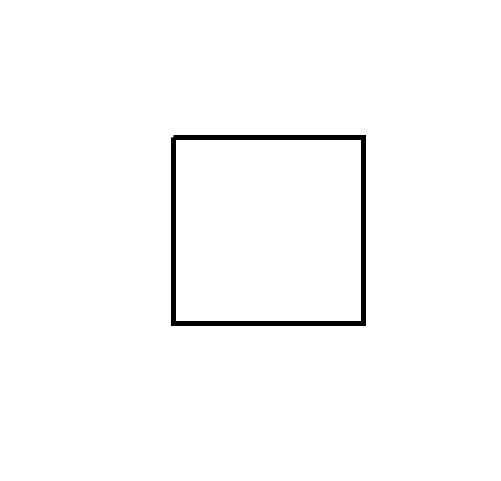

In [10]:
## examine reference shape (in this example, a square)
reallyRun = 1
if reallyRun:
    rsh.plot_stroke(ref_verts,ref_codes, canvas_side)

#### Try different transformation on each stroke

In [12]:
reload(rsh)
tra_verts_list = []
total_err = 0

# for verts in verts_list:
verts = verts_list[2]
min_err, tra_verts = rsh.minimize_transformation_err(verts, ref_verts)
total_err += min_err
tra_verts_list.append(tra_verts)

x_data size torch.Size([58, 2])
y_data size torch.Size([58, 2])
weight tensor([[1., 0.],
        [0., 1.]])
epoch 0
weight tensor([[ 4.9324,  7.8039],
        [10.1181, -0.4685]])
loss tensor(23207.2266)
epoch 0, loss 23207.2265625
epoch 1
weight tensor([[-11918.7520,  -9055.6729],
        [-11438.2070,  -7985.6846]])
loss tensor(1107755264.)
epoch 2
weight tensor([[23112986., 17083006.],
        [21551694., 15892445.]])
loss tensor(4020296889663488.)
epoch 3
weight tensor([[-44392034304., -32785731584.],
        [-41360670720., -30544996352.]])
loss tensor(14822419356287523356672.)
epoch 4
weight tensor([[85239590289408., 62952380039168.],
        [79417166528512., 58652232777728.]])
loss tensor(54649373616517240101462343680.)
epoch 5
weight tensor([[-163672046780284928., -120877413549735936.],
        [-152492057930235904., -112620613801082880.]])
loss tensor(201489002462948207320599305367060480.)
epoch 6
weight tensor([[314273390975028035584., 232101626967700275200.],
        [29280

weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 162
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 163
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 164
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 165
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 166
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 167
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 168
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 169
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 170
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 170, loss nan
epoch 171
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 172
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 173
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 174
weigh

loss tensor(nan)
epoch 300
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 300, loss nan
epoch 301
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 302
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 303
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 304
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 305
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 306
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 307
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 308
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 309
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 310
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 310, loss nan
epoch 311
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 312
weight tensor([[nan, nan],
      

        [nan, nan]])
loss tensor(nan)
epoch 444
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 445
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 446
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 447
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 448
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 449
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 450
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 450, loss nan
epoch 451
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 452
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 453
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 454
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 455
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 456
weight tensor([[nan, nan],
     

weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 649
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 650
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 650, loss nan
epoch 651
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 652
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 653
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 654
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 655
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 656
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 657
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 658
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 659
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 660
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 660, loss

epoch 864
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 865
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 866
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 867
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 868
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 869
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 870
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 870, loss nan
epoch 871
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 872
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 873
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 874
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 875
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch 876
weight tensor([[nan, nan],
        [nan, nan]])
loss tensor(nan)
epoch

In [ ]:
reallyRun = 1
if reallyRun:
    rsh.plot_coregistered_shapes(ref_verts,ref_codes,tra_verts,tra_codes)

##### test case for particular line segment AB on reference shape and point P on tracing (optional, sanity checks)

In [ ]:
run_tests = 0
if run_tests:
    ## toy case
    A = np.array((0,0))
    B = np.array((10,10))
    P = np.array((20,5)) ## first point

    ## get point C on A,B that minimizes distance from particular point on tracing to the line segment AB
    C = rsh.get_closest_point_from_P_to_AB(A,B,P,verbose=False) 
    
    ## example real case
    a = ref_verts[0]
    b = ref_verts[1]
    p = tra_verts[1]
    c,d = rsh.get_closest_point_from_P_to_AB(a,b,p,verbose=False) 
    print c,d    

#### get "corresponding points" on the reference shape for each vertex in the tracing

In [ ]:
## cor_verts will be the same shape as the tra_verts, and lie on the reference shape
## error will be computed as area between these two shapes
cor_verts = np.zeros((np.shape(tra_verts)[0],2))
for i,t in enumerate(tra_verts): ## loop through segments of the tracing
    p = t ## endpoint of the current tracing segment
    ## for a given point on the tracing, find the corresponding closest point on the reference shape
    ref_gen = rsh.pairs(ref_verts)
    D = 1e6 ## initialize at some crazy large value
    for r in ref_gen:
        a = r[0]
        b = r[1]
        c,d = rsh.get_closest_point_from_P_to_AB(a,b,p,verbose=False) 
        if d<D: ## if the shortest distance so far, then swap in for the value of D
            D = d
            C = c
        else:
            pass 
    cor_verts[i,:] = C ## assign the closest corresponding point to the "corresponding vertices" array

In [ ]:
## test to make sure the corresponding points really lie on the reference shape
reload(rsh)
reallyRun = 1
if reallyRun:
    rsh.plot_corresponding_points_on_reference(tra_verts,tra_codes,ref_verts,ref_codes,cor_verts)

#### actually get svg distance error now

In [ ]:
## iterate through each pair of line segments comprising the tracing verts
## and corresponding verts, and increment error as area between the line
## segments. 
## When line segments are non-intersecting and non-collinear, safe to use
## general polygon area formula (add the trapezoid)
## If line segments are parallel but not collinear, safe to use
## general polygon area formula (add the trapezoid)
## If line segments intersect, then add the resulting triangles
## formed by the intersecting segments
## If line segments are collinear, do not increment error, b/c perfectly on the line
tracing_to_corresponding_error = rsh.get_area_between_tracing_and_corresponding_verts(tra_verts,cor_verts)

## add to the above the deviation between the area of the reference
## shape and the corresponding shape
cor_area = rsh.get_area_polygon(cor_verts)
ref_area = rsh.get_area_polygon(ref_verts)
corresponding_to_reference_error = abs(abs(ref_area)-abs(cor_area))

In [ ]:
## total error is sum of tracing_to_corresponding_error and corresponding_to_reference_error
total_error = tracing_to_corresponding_error + tracing_to_corresponding_error

svg_distance_score = np.sqrt(total_error)
print 'SVG distance score = {}'.format(svg_distance_score)